<a href="https://colab.research.google.com/github/risjain24/Landslide-Trigger-Prediction/blob/main/Landslides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING DATASET

Dataset Source https://data.wprdc.org/

In [ ]:
import pandas as pd
temp_df = pd.read_csv("Desktop\MiniProject\landslides.csv")

In [ ]:
df = temp_df
df.head()

,src_name,src_link,ev_id,ev_date,ev_time,ev_title,ev_desc,loc_desc,loc_accu,ls_cat,...,ev_imp_id,latitude,longitude,ctry_name,ctry_code,div_name,gaz_point,gaz_dist,sub_date,edit_date
0,Oregon DOT,NaN,"8,840",2011-01-16,16:00,"OR 218, milepost 34.9",NaN,"OR 218, milepost 34.9",exact,landslide,...,8840.0,44.9184,-120.2668,United States,US,Oregon,Kinzua,18.34,2016-07-08,2018-06-23
1,www.itv.com,http://www.itv.com/news/westcountry/2013-12-30...,"5,725",2013-12-25,NaN,"Calstock, Cornwall",The Army is on standby to help residents in Ca...,"Calstock, Cornwall",1km,landslide,...,5725.0,50.4972,-4.2100,United Kingdom,GB,England,Plymouth,10.57,2014-04-01,2018-06-23
2,business-standard,http://www.business-standard.com/generalnews/n...,"4,343",2012-05-01,14:00,"Shennongjia, Hubei",More than 300 tourists were evacuated after a ...,"Shennongjia, Hubei",25km,landslide,...,4343.0,31.7501,110.6807,China,CN,Hubei,Nan He,13.49,2014-04-01,2018-06-23
3,The Statesman,http://www.thestatesman.com/news/northeast/lan...,"6,964",2015-06-17,NaN,"National Highway 31A, Darjeeling Hills","Note: one article listed multiple landslides, ...","National Highway 31A, Darjeeling Hills",50km,landslide,...,6964.0,27.0087,88.4430,India,IN,West Bengal,Kalimpong,8.03,2015-06-25,2018-06-23
4,pia,http://www.pia.gov.ph/?m=12&fi=p080104.htm&no=10,408,2008-01-03,NaN,Pancho Villa and Kahupian villages in Sogod,very little information on the hazard,Pancho Villa and Kahupian villages in Sogod,25km,landslide,...,408.0,10.3904,124.9851,Philippines,PH,Southern Leyte,Sogod,0.07,2014-04-01,2018-06-23


# DATA CLEANING

In [ ]:
df.isnull().sum()

src_name          0
src_link        808
ev_id             0
ev_date           0
ev_time        6179
ev_title          1
ev_desc         864
loc_desc        100
loc_accu          2
ls_cat            2
ls_trig          33
ls_size          10
ls_setting       79
fatalities        0
injuries          0
storm_name    10761
photo_link     9665
comments      10973
ev_imp_src        0
ev_imp_id      1868
latitude          0
longitude         0
ctry_name        40
ctry_code        42
div_name         40
gaz_point         0
gaz_dist          0
sub_date          9
edit_date         0
dtype: int64

In [ ]:
df = df.drop(columns = ['ev_time','storm_name','photo_link','comments','loc_accu','ev_imp_id',"src_link","ev_desc","ev_imp_src","src_name","ev_date","ev_title","loc_desc","ctry_code","gaz_point","sub_date","edit_date"])

In [ ]:
df.isnull().sum()

ev_id          0
ls_cat         2
ls_trig       33
ls_size       10
ls_setting    79
fatalities     0
injuries       0
latitude       0
longitude      0
ctry_name     40
div_name      40
gaz_dist       0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

ev_id         0
ls_cat        0
ls_trig       0
ls_size       0
ls_setting    0
fatalities    0
injuries      0
latitude      0
longitude     0
ctry_name     0
div_name      0
gaz_dist      0
dtype: int64

In [ ]:
df['ls_trig'].unique()

array(['unknown', 'rain', 'downpour', 'continuous_rain', 'flooding',
       'mining', 'other', 'tropical_cyclone', 'construction', 'monsoon',
       'earthquake', 'snowfall_snowmelt', 'leaking_pipe',
       'no_apparent_trigger', 'freeze_thaw', 'volcano',
       'dam_embankment_collapse', 'vibration'], dtype=object)

In [ ]:
df.drop(df.index[df['ls_trig']=='unknown'], inplace=True)

In [ ]:
df

,ev_id,ls_cat,ls_trig,ls_size,ls_setting,fatalities,injuries,latitude,longitude,ctry_name,div_name,gaz_dist
1,"5,725",landslide,rain,medium,unknown,0,0,50.4972,-4.2100,United Kingdom,England,10.57
2,"4,343",landslide,downpour,medium,unknown,0,0,31.7501,110.6807,China,Hubei,13.49
3,"6,964",landslide,downpour,small,unknown,0,0,27.0087,88.4430,India,West Bengal,8.03
4,408,landslide,rain,medium,unknown,0,0,10.3904,124.9851,Philippines,Southern Leyte,0.07
6,"6,628",landslide,downpour,medium,above_road,0,0,46.9780,-123.7960,United States,Washington,3.58
...,...,...,...,...,...,...,...,...,...,...,...,...
11332,"1,958",landslide,monsoon,medium,retaining_wall,2,0,19.0176,72.8562,India,Maharashtra,7.89
11333,"2,082",landslide,tropical_cyclone,medium,unknown,0,0,6.3665,124.7338,Philippines,South Cotabato,2.72
11334,"1,498",landslide,rain,medium,unknown,0,0,34.1510,74.1213,India,Jammu and Kashmir,5.05
11335,"9,461",unknown,tropical_cyclone,medium,above_road,0,0,20.4475,-98.1654,Mexico,Hidalgo,5.86


# DATA ANALYSIS

In [ ]:
data_count = df['ls_trig'].value_counts()

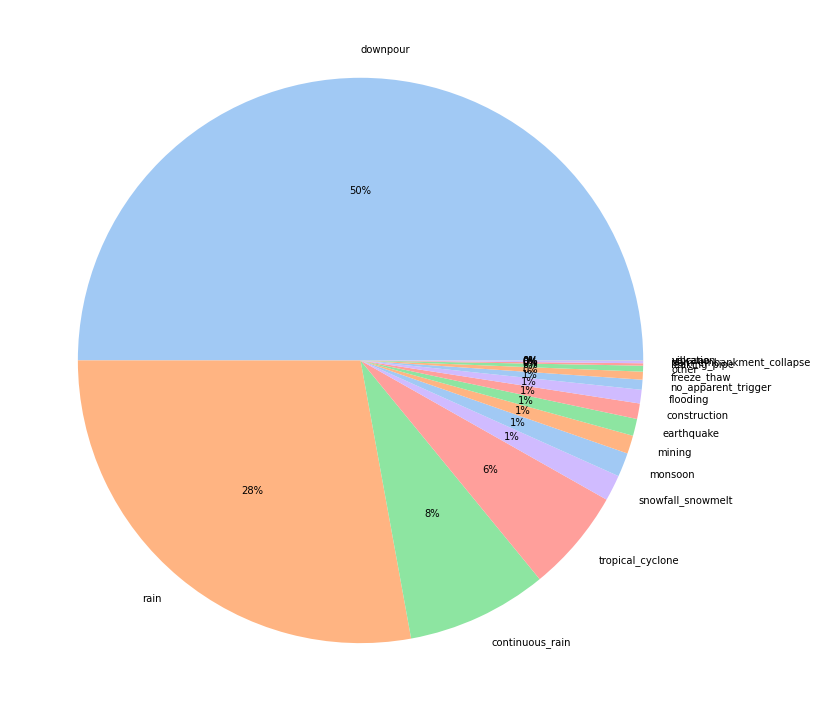

In [ ]:
plt.rcParams["figure.figsize"] = [13.00, 13.00]
colors = sns.color_palette('pastel')[0:5]
plt.pie(data_count, labels = data_count.keys(), colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
ctry_count = df['ctry_name'].value_counts()
ctry_count = ctry_count.head(10)

<AxesSubplot:>

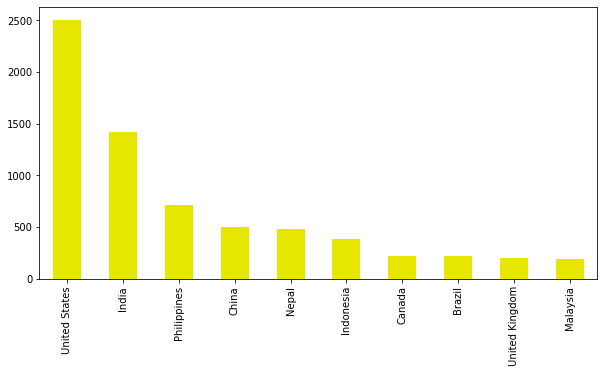

In [ ]:
plt.rcParams["figure.figsize"] = [10.00, 5.00]
ctry_count.plot(kind='bar',color='#e6e600')

# FEATURE EXTRACTION

In [ ]:
df['ls_trig'].unique()

array(['rain', 'downpour', 'continuous_rain', 'flooding', 'mining',
       'other', 'tropical_cyclone', 'construction', 'monsoon',
       'earthquake', 'snowfall_snowmelt', 'leaking_pipe',
       'no_apparent_trigger', 'freeze_thaw', 'volcano',
       'dam_embankment_collapse', 'vibration'], dtype=object)

In [ ]:
new_map = {'rain' : 1,'downpour': 2,'continuous_rain' : 3,'flooding' : 4,'mining' : 5,'other' : 0,'tropical_cyclone' : 6,
       'construction' : 7,'monsoon' : 8,'earthquake' : 9,'snowfall_snowmelt' : 10,'leaking_pipe' : 11,
       'no_apparent_trigger' : 0,'freeze_thaw' : 12,'volcano' : 13,'dam_embankment_collapse' : 14,'vibration' : 15}

In [ ]:
df = df.replace({"ls_trig" : new_map})

In [ ]:
df

,ev_id,ls_cat,ls_trig,ls_size,ls_setting,fatalities,injuries,latitude,longitude,ctry_name,div_name,gaz_dist
1,"5,725",landslide,1,medium,unknown,0,0,50.4972,-4.2100,United Kingdom,England,10.57
2,"4,343",landslide,2,medium,unknown,0,0,31.7501,110.6807,China,Hubei,13.49
3,"6,964",landslide,2,small,unknown,0,0,27.0087,88.4430,India,West Bengal,8.03
4,408,landslide,1,medium,unknown,0,0,10.3904,124.9851,Philippines,Southern Leyte,0.07
6,"6,628",landslide,2,medium,above_road,0,0,46.9780,-123.7960,United States,Washington,3.58
...,...,...,...,...,...,...,...,...,...,...,...,...
11332,"1,958",landslide,8,medium,retaining_wall,2,0,19.0176,72.8562,India,Maharashtra,7.89
11333,"2,082",landslide,6,medium,unknown,0,0,6.3665,124.7338,Philippines,South Cotabato,2.72
11334,"1,498",landslide,1,medium,unknown,0,0,34.1510,74.1213,India,Jammu and Kashmir,5.05
11335,"9,461",unknown,6,medium,above_road,0,0,20.4475,-98.1654,Mexico,Hidalgo,5.86


In [ ]:
df=df[df['ls_cat']=='landslide']

In [ ]:
new_map = {v: k for k, v in new_map.items()}

In [ ]:
df

,ev_id,ls_cat,ls_trig,ls_size,ls_setting,fatalities,injuries,latitude,longitude,ctry_name,div_name,gaz_dist
1,"5,725",landslide,1,medium,unknown,0,0,50.4972,-4.2100,United Kingdom,England,10.57
2,"4,343",landslide,2,medium,unknown,0,0,31.7501,110.6807,China,Hubei,13.49
3,"6,964",landslide,2,small,unknown,0,0,27.0087,88.4430,India,West Bengal,8.03
4,408,landslide,1,medium,unknown,0,0,10.3904,124.9851,Philippines,Southern Leyte,0.07
6,"6,628",landslide,2,medium,above_road,0,0,46.9780,-123.7960,United States,Washington,3.58
...,...,...,...,...,...,...,...,...,...,...,...,...
11330,"4,911",landslide,2,medium,unknown,0,0,28.3952,83.5043,Nepal,Dhawalagiri,8.89
11331,"2,434",landslide,2,medium,unknown,0,0,27.8808,83.3395,Nepal,Lumbini,20.38
11332,"1,958",landslide,8,medium,retaining_wall,2,0,19.0176,72.8562,India,Maharashtra,7.89
11333,"2,082",landslide,6,medium,unknown,0,0,6.3665,124.7338,Philippines,South Cotabato,2.72


In [ ]:
df = df.drop(columns = ["ls_cat"])

In [ ]:
df_new = pd.get_dummies(df["ls_size"])
df = pd.concat([df,df_new],axis=1)
df_new = pd.get_dummies(df["ls_setting"])
df = pd.concat([df,df_new],axis=1)
df_new = pd.get_dummies(df["ctry_name"])
df = pd.concat([df,df_new],axis=1)
df_new = pd.get_dummies(df["div_name"])
df = pd.concat([df,df_new],axis=1)
df = df.drop(columns = ["ls_size","ls_setting","ctry_name","div_name"])

In [ ]:
df['ls_trig'].unique()

array([ 1,  2,  3,  4,  5,  0,  6,  7,  8,  9, 10, 11, 12, 14],
      dtype=int64)

In [ ]:
df

,ev_id,ls_trig,fatalities,injuries,latitude,longitude,gaz_dist,catastrophic,large,medium,...,Zamboanga City,Zamboanga Sibuguey,Zamboanga del Norte,Zamboanga del Sur,Zamora-Chinchipe,Zhejiang,Zlínsky,Ôita,Şan‘ā’,Şā‘dah
1,"5,725",1,0,0,50.4972,-4.2100,10.57,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"4,343",2,0,0,31.7501,110.6807,13.49,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"6,964",2,0,0,27.0087,88.4430,8.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,408,1,0,0,10.3904,124.9851,0.07,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,"6,628",2,0,0,46.9780,-123.7960,3.58,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11330,"4,911",2,0,0,28.3952,83.5043,8.89,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11331,"2,434",2,0,0,27.8808,83.3395,20.38,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11332,"1,958",8,2,0,19.0176,72.8562,7.89,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11333,"2,082",6,0,0,6.3665,124.7338,2.72,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['ev_id']=df['ev_id'].str.replace(',', '')
df['fatalities']=df['fatalities'].str.replace(',', '')

In [ ]:
df

,ev_id,ls_trig,fatalities,injuries,latitude,longitude,gaz_dist,catastrophic,large,medium,...,Zamboanga City,Zamboanga Sibuguey,Zamboanga del Norte,Zamboanga del Sur,Zamora-Chinchipe,Zhejiang,Zlínsky,Ôita,Şan‘ā’,Şā‘dah
1,5725,1,0,0,50.4972,-4.2100,10.57,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4343,2,0,0,31.7501,110.6807,13.49,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6964,2,0,0,27.0087,88.4430,8.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,408,1,0,0,10.3904,124.9851,0.07,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,6628,2,0,0,46.9780,-123.7960,3.58,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11330,4911,2,0,0,28.3952,83.5043,8.89,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11331,2434,2,0,0,27.8808,83.3395,20.38,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11332,1958,8,2,0,19.0176,72.8562,7.89,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11333,2082,6,0,0,6.3665,124.7338,2.72,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv('final.csv',header = True,index = False)

In [ ]:
x = df.loc[:,df.columns != 'ls_trig']
y = df.loc[:,'ls_trig']

## Splitting the data into testing and training data

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
x, y = shuffle(x,y)

x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print(y_train.shape)
print(x_train.shape)

(8951,)
(8951, 1365)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(2238, 1365)
(2238,)


# FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
scores=[]

# MODEL CONSTRUCTION

In [ ]:
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(x_test)
scores.append(accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(solver='lbfgs',max_iter=10000)
clf2.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = clf2.predict(x_test)
scores.append(accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier()
clf3.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf3.predict(x_test)
scores.append(accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(n_estimators=1000)
clf4.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
y_pred = clf4.predict(x_test)
scores.append(accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf5 = KNeighborsClassifier(n_neighbors=1)
clf5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = clf5.predict(x_test)
scores.append(accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf6 = GaussianNB()
clf6.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = clf5.predict(x_test)
scores.append(accuracy_score(y_test,y_pred))

# MODEL EVALUATION

In [ ]:
scores

[0.7153708668453976,
 0.707774798927614,
 0.6559428060768543,
 0.7278820375335121,
 0.6362823949955317,
 0.6362823949955317]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
names=["SVM","Logistic Regression","Decision Tree","Random Forest","K Nearest Neighbors","Gaussian Naive Bayes"]

In [ ]:
df = pd.DataFrame()
df['Algorithm_name'] = names
df['Accuracy_score'] = scores

In [ ]:
df

,Algorithm_name,Accuracy_score
0,SVM,0.715371
1,Logistic Regression,0.707775
2,Decision Tree,0.655943
3,Random Forest,0.727882
4,K Nearest Neighbors,0.636282
5,Gaussian Naive Bayes,0.636282


In [ ]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Algorithm_name,Accuracy_score
0,SVM,0.715371
1,Logistic Regression,0.707775
2,Decision Tree,0.655943
3,Random Forest,0.727882
4,K Nearest Neighbors,0.636282
5,Gaussian Naive Bayes,0.636282


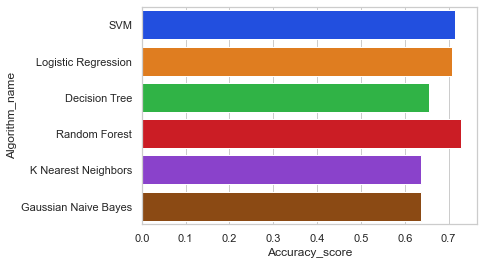

In [ ]:
sns.set(style="whitegrid",palette="bright")
ax = sns.barplot(y="Algorithm_name", x="Accuracy_score", data=df)

# RESULTS

In [ ]:
y_pred = clf3.predict(x_test)

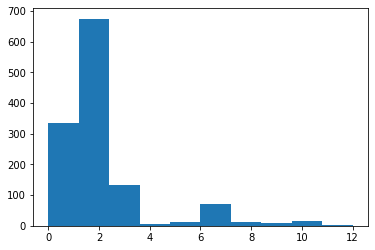

In [ ]:
plt.hist(y_pred)
plt.show()

In [ ]:
dfrep = pd.DataFrame(y_pred, columns = ['ls_trig'])

In [ ]:
dfrep = dfrep.replace({"ls_trig" : new_map})

In [ ]:
dfrep

,ls_trig
0,downpour
1,downpour
2,downpour
3,rain
4,continuous_rain
...,...
1268,continuous_rain
1269,earthquake
1270,rain
1271,downpour


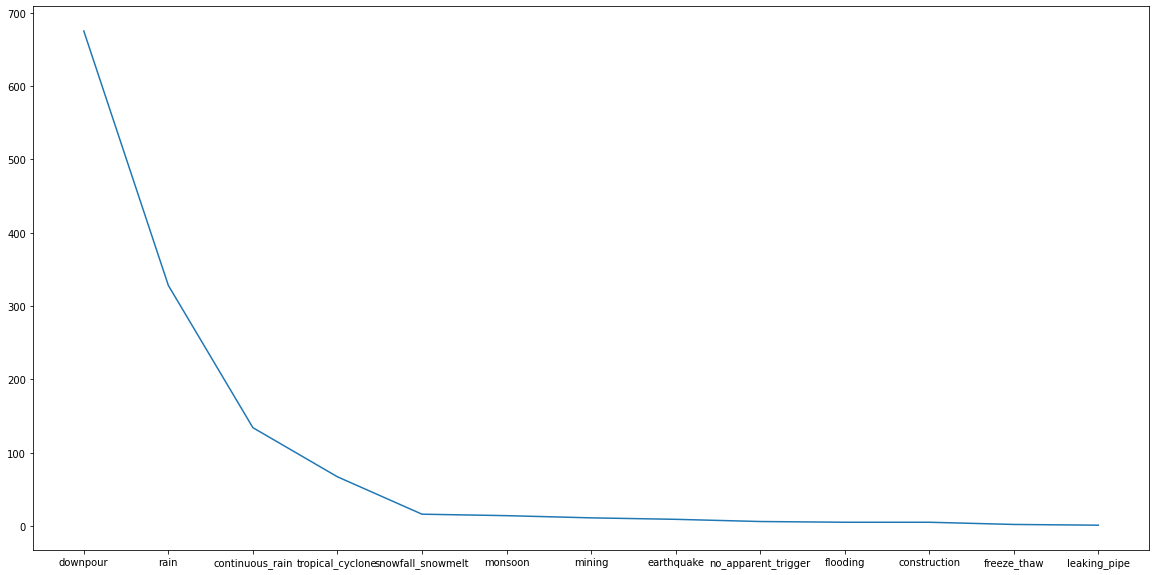

In [ ]:
plt.rcParams["figure.figsize"] = [20.00, 10.00]
plt.plot(dfrep['ls_trig'].value_counts())

In [ ]:
df_count = dfrep['ls_trig'].value_counts()

In [ ]:
df_count.keys()

Index(['downpour', 'rain', 'continuous_rain', 'tropical_cyclone',
       'snowfall_snowmelt', 'monsoon', 'mining', 'earthquake',
       'no_apparent_trigger', 'flooding', 'construction', 'freeze_thaw',
       'leaking_pipe'],
      dtype='object')

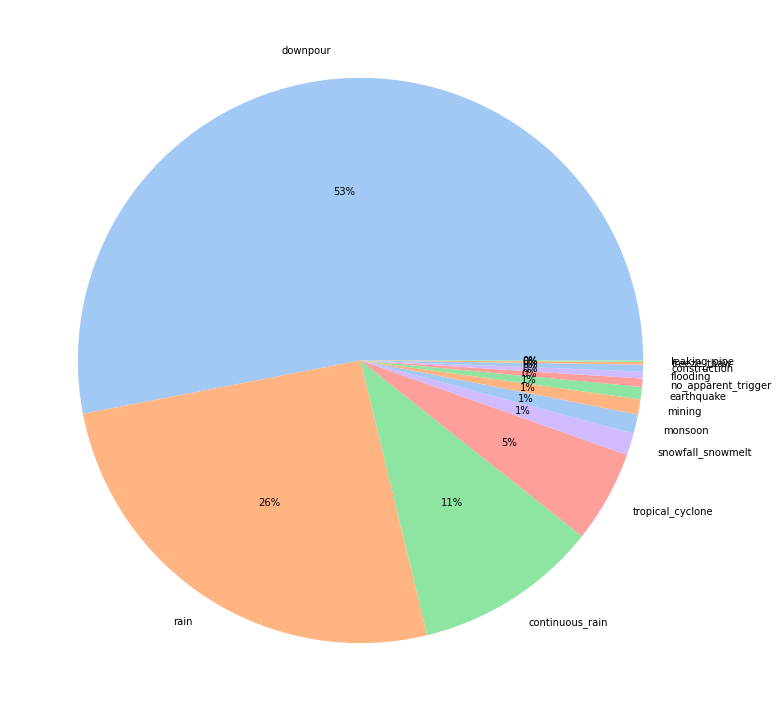

In [ ]:
plt.rcParams["figure.figsize"] = [13.00, 13.00]
colors = sns.color_palette('pastel')[0:5]
plt.pie(df_count, labels = df_count.keys(), colors = colors, autopct='%.0f%%')
plt.show()